In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import geopandas as gpd

pd.options.display.max_columns = None

In [2]:
df15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df22 = pd.read_csv("data/avistamientos/vis_2022.csv")

In [3]:
# Agrupar los avistamientos por locName, para obtener el número de avistamientos por localidad en 2020 y el tipo de ave 
df_aves_localida = df20.groupby(['locName', 'comName']).size().reset_index(name='counts')
df_aves_localida = df_aves_localida.sort_values(by=['counts'], ascending=False)
df_aves_localida = df_aves_localida.reset_index(drop=True)
df_aves_localida

,locName,comName,counts
0,Quebrada El Arrayán--La Villa,White-banded Mockingbird,51
1,Cerro Los Piques,Gray-hooded Sierra Finch,19
2,SN Humedal Río Maipo--Desembocadura,Ticking Doradito,19
3,Río Lluta--Desembocadura,White-cheeked Pintail,18
4,SN Humedal Angachilla--Puente Angachilla,Common Gallinule,17
...,...,...,...
1708,Estero Catapilco--Desembocadura (Laguna Zapallar),West Peruvian Dove,1
1709,Estero Catapilco--Desembocadura (Laguna Zapallar),Patagonian Sierra Finch,1
1710,Estero Cartagena--Desembocadura (Humedal Urbano),White-faced Ibis,1
1711,Estero Cartagena--Desembocadura (Humedal Urbano),South American Tern,1


In [4]:
df15.sort_values(by="howMany", ascending=False).head(10)
df16.sort_values(by="howMany", ascending=False).head(10)
df17.sort_values(by="howMany", ascending=False).head(10)
df18.sort_values(by="howMany", ascending=False).head(10)
df19.sort_values(by="howMany", ascending=False).head(10)
df20.sort_values(by="howMany", ascending=False).head(10)
df21.sort_values(by="howMany", ascending=False).head(10)
df22.sort_values(by="howMany", ascending=False).head(10)


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
3063,impcor1,Imperial Cormorant,Leucocarbo atriceps,L3438732,MN Los Pingüinos--Isla Magdalena,2022-11-11,50000.0,-52.920237,-70.575957,False,-1,Magallanes
529,sooshe,Sooty Shearwater,Ardenna grisea,L947356,Moncul,2022-02-21,30000.0,-38.746787,-73.436394,False,-1,Araucanía
83,redkno,Red Knot,Calidris canutus,L18473398,SN Bahía Lomas--Desembocadura Río Side,2022-01-09,14073.0,-52.682552,-69.184681,False,-1,Magallanes
2218,maspet,Markham's Storm-Petrel,Hydrobates markhami,L16872547,Quebrada de Vitor--Mirador,2022-08-25,8000.0,-18.748319,-70.337648,False,-1,Arica y Parinacota
493,sooshe,Sooty Shearwater,Ardenna grisea,L17797457,Bay Talcahuano,2022-02-18,8000.0,-36.675372,-73.034720,True,-1,Bío-Bío
3101,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L19352319,Islas Cullintos,2022-11-13,7000.0,-36.786346,-73.219790,False,-1,Bío-Bío
241,whrsan,White-rumped Sandpiper,Calidris fuscicollis,L8481103,Acceso Pepita,2022-01-27,3500.0,-52.477308,-69.389010,True,-1,Magallanes
3036,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L931512,"Tolten, Nigue norte",2022-11-08,3000.0,-39.298904,-73.229198,False,-1,Araucanía
3608,sander,Sanderling,Calidris alba,L21938859,"A-210, Arica, Arica y Parinacota, CL (-18,421,...",2022-12-27,3000.0,-18.421091,-70.319230,True,-1,Arica y Parinacota
3236,hudgod,Hudsonian Godwit,Limosa haemastica,L10674205,Estero Rulo,2022-11-25,2800.0,-41.701408,-73.094813,False,-1,Los Lagos


In [5]:
def por_mes(df):
    df["mes"] = pd.to_datetime(df["obsDt"]).dt.month
    df = df.groupby(by=['mes']).size().reset_index(name='cantidad')
    return df

In [6]:
# def por_mes(df):
    # df20_mes = df.groupby("obsDt").sum()
    # df20_mes = df20_mes.reset_index()
    # df20_mes = df20_mes[["obsDt", "howMany"]]
    # df20_mes = df20_mes.rename(columns={"obsDt": "mes", "howMany": "cantidad"})
    # df20_mes["mes"] = pd.to_datetime(df20_mes["mes"])
    # df20_mes["mes"] = df20_mes["mes"].dt.month
    # df20_mes = df20_mes.groupby("mes").sum()
    # df20_mes = df20_mes.reset_index()
    # return df20_mes

In [7]:
# Agruparemos df20, por obsDT, para ver por mes la cantidad de avistamientos de aves en total, por lo tanto sumaremos la columna howMany para cada mes y lo guardaremos en un nuevo dataframe llamado df20_mes
df15_mes = por_mes(df15)
df16_mes = por_mes(df16)
df17_mes = por_mes(df17)
df18_mes = por_mes(df18)
df19_mes = por_mes(df19)
df20_mes = por_mes(df20)
df21_mes = por_mes(df21)
df22_mes = por_mes(df22)

In [8]:
df15_mes

,mes,cantidad
0,1,173
1,2,242
2,3,202
3,4,199
4,5,148
5,6,123
6,7,144
7,8,128
8,9,171
9,10,260


In [9]:
dfs = [df15_mes, df16_mes, df17_mes, df18_mes, df19_mes, df20_mes, df21_mes, df22_mes]

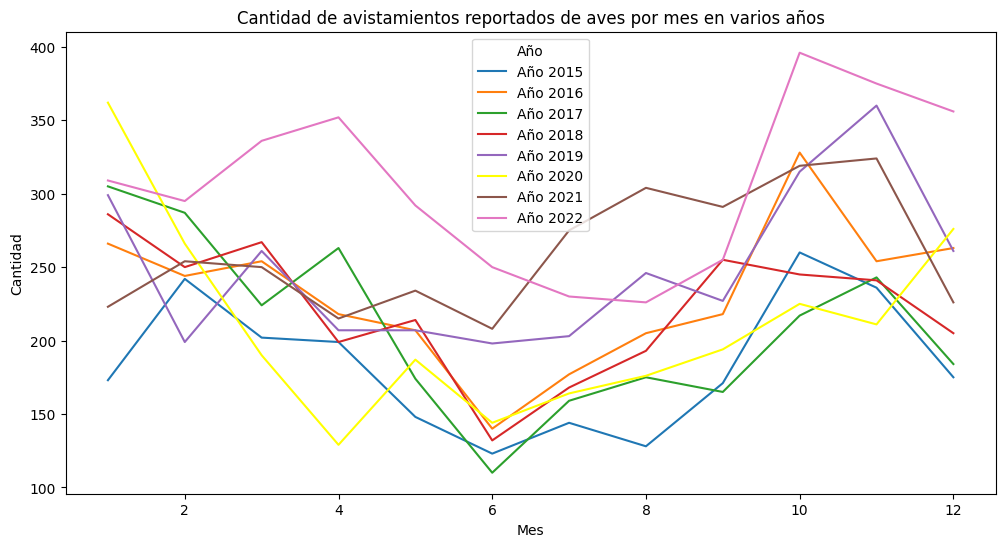

In [10]:
# Graficaremos df20_mes, por cada mes, con mes 1,2,3,4,5,6,7,8,9,10,11,12 con lineplot 

plt.figure(figsize=(12, 6))
a = 2015
for anho in dfs:
    if a == 2020:
        sns.lineplot(data=anho, x="mes", y="cantidad", label=f"Año {a}", color="yellow")
    else:
        sns.lineplot(data=anho, x="mes", y="cantidad", label=f"Año {a}")
    a +=1
plt.title("Cantidad de avistamientos reportados de aves por mes en varios años")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.legend(title="Año")
plt.show()



In [11]:
df19.dtypes

speciesCode         object
comName             object
sciName             object
locId               object
locName             object
obsDt               object
howMany            float64
lat                float64
lng                float64
locationPrivate       bool
exoticCategory       int64
region              object
mes                  int32
dtype: object

In [12]:
df18.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory,mes
120,Franklin's Gull,27110.0,-1373.296933,-2902.989420,6,-40,240
274,Sanderling,20310.0,-1302.247376,-2717.055041,7,-38,231
183,Magellanic Penguin,17500.0,-105.767341,-141.155949,0,-2,23
155,Hudsonian Godwit,15575.0,-903.689783,-1581.483717,9,-22,126
243,Red Knot,13593.0,-938.263785,-1632.006249,6,-23,98
...,...,...,...,...,...,...,...
240,Purple Gallinule,1.0,-18.480749,-70.309153,0,-1,5
296,Solitary Sandpiper,1.0,-18.416539,-70.322408,0,-1,6
338,Variable Oriole,1.0,-31.899238,-70.677710,0,-1,12
205,Oasis Hummingbird,0.0,-32.870771,-70.587534,1,-1,12


In [13]:
df19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)


,comName,howMany,lat,lng,locationPrivate,exoticCategory,mes
300,Sooty Shearwater,30900.0,-145.841363,-215.594767,3,-3,15
155,Guanay Cormorant,24007.0,-192.646573,-429.987735,1,-6,59
279,Sanderling,11540.0,-798.587163,-1716.283294,3,-24,114
293,Slender-billed Parakeet,10519.0,-506.630941,-943.740630,8,-13,88
225,Peruvian Booby,6934.0,-144.942511,-289.701008,0,-4,23
...,...,...,...,...,...,...,...
337,Wedge-rumped Storm-Petrel,1.0,-24.508915,-73.370752,1,-1,4
188,Magellanic Diving-Petrel,1.0,-53.126904,-70.859795,0,-1,3
82,Chilean Mockingbird,0.0,-33.426346,-70.805287,1,-1,6
334,Vermilion Flycatcher,0.0,-18.828150,-70.136249,1,-1,11


In [14]:
# Sumaremos toda la columna de howmany para obtener el total de avistamientes en general
df19["howMany"].sum()


203405.0

In [15]:

df20.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)



,comName,howMany,lat,lng,locationPrivate,exoticCategory,mes
284,Sooty Shearwater,83000.0,-261.124492,-433.935753,4,-6,40
146,Guanay Cormorant,25028.0,-527.181828,-1085.561893,4,-15,83
262,Sanderling,10162.0,-1051.772146,-2216.834155,4,-31,139
154,Hudsonian Godwit,9157.0,-1137.672651,-2020.841857,7,-28,202
278,Snowy Egret,8361.0,-237.636381,-437.218130,6,-6,25
...,...,...,...,...,...,...,...
258,Rufous-webbed Bush-Tyrant,1.0,-18.413088,-69.507151,0,-1,3
87,Cockatiel,1.0,-33.416702,-70.672811,1,1,4
95,Cordilleran Canastero,1.0,-35.954761,-70.573684,0,-1,1
246,Rose-ringed Parakeet,1.0,-33.087369,-71.379381,1,1,8


In [16]:
df20["howMany"].sum()



259392.0

In [17]:
df21.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory,mes
244,Sanderling,25309.0,-834.214836,-1785.805968,2,-25,148
174,Markham's Storm-Petrel,15082.0,-96.275779,-350.884308,4,-5,25
137,Guanay Cormorant,10301.0,-601.148881,-1161.700667,6,-16,104
22,Austral Parakeet,10000.0,-39.648704,-73.151665,1,-1,9
146,Hudsonian Godwit,9105.0,-1483.973661,-2817.603801,10,-39,219
...,...,...,...,...,...,...,...
106,Eastern Rosella,1.0,-33.599847,-70.618291,1,1,11
267,Sooty Tern,1.0,-27.135174,-109.421479,1,-1,8
302,Westland Petrel,1.0,-54.442895,-69.133530,1,-1,11
29,Barn Owl,1.0,-33.570899,-70.635695,0,-1,9


In [18]:
df21["howMany"].sum()



180133.0

In [19]:
df22.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory,mes
156,Imperial Cormorant,50000.0,-52.920237,-70.575957,0,-1,11
294,Sooty Shearwater,38000.0,-75.422159,-146.471114,1,-2,4
269,Sanderling,26933.0,-1324.194522,-2859.180170,4,-40,262
146,Guanay Cormorant,19742.0,-814.264118,-1525.711592,2,-21,157
237,Red Knot,15687.0,-1825.673744,-3645.654813,8,-51,337
...,...,...,...,...,...,...,...
48,Blue-crowned Parakeet,1.0,-18.480749,-70.309153,0,2,2
320,Tawny-headed Swallow,1.0,-32.884417,-71.506748,0,-1,4
47,Blue-and-yellow Tanager,1.0,-33.500541,-71.616202,0,-1,6
372,Zebra Finch,1.0,-33.490079,-70.738535,1,2,8


In [20]:
df22["howMany"].sum()


266272.0

In [21]:
# Queremos graficar la columna howMany de cada dataframe para ver la evolución de los avistamientos de aves en los últimos años en Chile 
# Para esto, crearemos un nuevo dataframe que contenga la suma de la columna howMany de cada dataframe de avistamientos
df_aves_cantidad = pd.DataFrame(columns=["year", "howMany"])
df_aves_cantidad["year"] = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_aves_cantidad["howMany"] = [df15["howMany"].sum(), df16["howMany"].sum(), df17["howMany"].sum(), df18["howMany"].sum(), df19["howMany"].sum(), df20["howMany"].sum(), df21["howMany"].sum(), df22["howMany"].sum()]


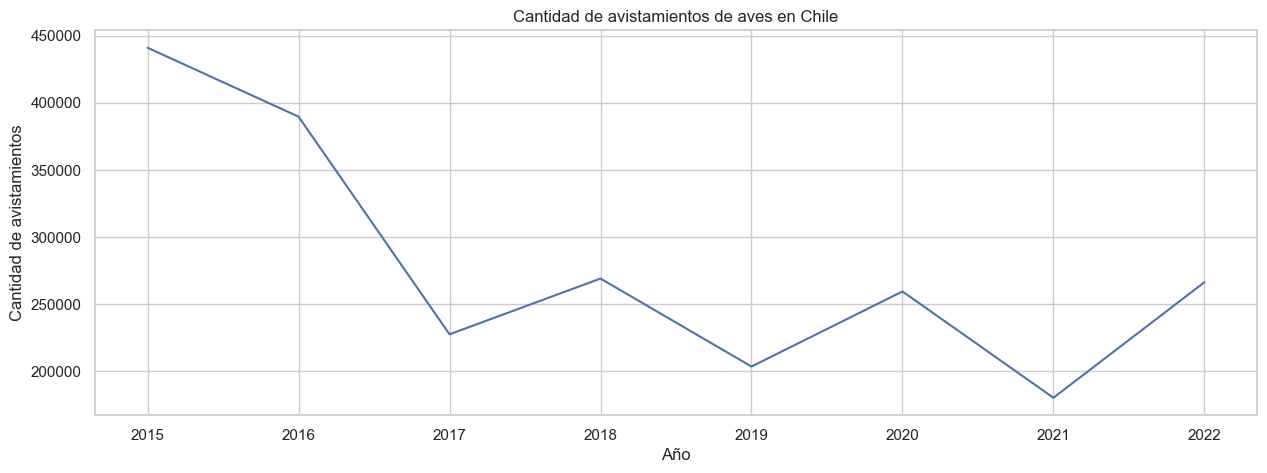

In [22]:
# Graficaremos grid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_aves_cantidad, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()


# FIU FUI

### POR MES

In [23]:
unificado = pd.concat([df15, df16, df17, df18, df19, df20, df21, df22])
sc = (unificado[unificado["sciName"] == "Tachuris rubrigastra"])
sc["mes"] = pd.to_datetime(sc["obsDt"]).dt.month
sc = sc.groupby(by="mes").sum('howMany').reset_index()
sc[["mes", "howMany"]]

C:\Users\matar\AppData\Local\Temp\ipykernel_5020\1707898540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc["mes"] = pd.to_datetime(sc["obsDt"]).dt.month


,mes,howMany
0,1,44.0
1,2,4.0
2,3,33.0
3,4,106.0
4,5,6.0
5,7,26.0
6,8,45.0
7,9,3.0
8,10,30.0
9,12,1.0


In [24]:
sc = (unificado[unificado["sciName"] == "Tachuris rubrigastra"])
sc = sc.groupby(by="region").sum('howMany').reset_index()
sc[["region", "howMany"]].sort_values(by="howMany", ascending=False)

,region,howMany
3,Los Ríos,90.0
5,Región Metropolitana de Santiago,72.0
7,Valparaíso,55.0
4,Magallanes,45.0
2,Los Lagos,12.0
0,Antofagasta,10.0
6,Tarapacá,8.0
1,Atacama,6.0


In [25]:
sc = (unificado[unificado["sciName"] == "Tachuris rubrigastra"])
sc["mes"] = pd.to_datetime(sc["obsDt"]).dt.month
sc = sc.groupby(by=["mes", 'region']).sum('howMany').reset_index()
sc[["mes", 'region',"howMany"]].sort_values(by="howMany", ascending=False)

C:\Users\matar\AppData\Local\Temp\ipykernel_5020\810000498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc["mes"] = pd.to_datetime(sc["obsDt"]).dt.month


,mes,region,howMany
10,4,Región Metropolitana de Santiago,46.0
8,4,Los Ríos,45.0
3,1,Valparaíso,30.0
5,3,Los Ríos,30.0
12,7,Región Metropolitana de Santiago,26.0
15,8,Valparaíso,25.0
18,10,Magallanes,24.0
9,4,Magallanes,15.0
14,8,Los Ríos,15.0
0,1,Los Lagos,12.0


In [26]:
df20

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region,mes
0,oashum1,Oasis Hummingbird,Rhodopis vesper,L7402077,"Calle Isluga, Huechuraba CL-Metropolitana de S...",2020-01-01,1.0,-33.354203,-70.684158,True,-1,Región Metropolitana de Santiago,1
1,fotfly,Fork-tailed Flycatcher,Tyrannus savana,L10407545,Teno,2020-01-01,1.0,-34.869683,-71.180181,True,-1,Maule,1
2,whfibi,White-faced Ibis,Plegadis chihi,L791057,Estero El Culebrón--Desembocadura,2020-01-01,18.0,-29.961702,-71.321821,False,-1,Coquimbo,1
3,mallar3,Mallard,Anas platyrhynchos,L10397332,"Puerto Varas, Lago Llanquihue",2020-01-01,5.0,-41.322185,-72.975572,True,1,Los Lagos,1
4,gyhsif1,Gray-hooded Sierra Finch,Phrygilus gayi,L1030452,Camino a La Parva--Vegas y Pastizales,2020-01-01,11.0,-33.344224,-70.299046,False,-1,Región Metropolitana de Santiago,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,andduc1,Andean Duck,Oxyura ferruginea,L502857,Tranque La Cadellada,2020-12-31,1.0,-33.204940,-70.789204,False,-1,Región Metropolitana de Santiago,12
2520,leasee1,Least Seedsnipe,Thinocorus rumicivorus,L570658,SN Laguna Batuco,2020-12-31,1.0,-33.206443,-70.827913,False,-1,Región Metropolitana de Santiago,12
2521,whfibi,White-faced Ibis,Plegadis chihi,L570658,SN Laguna Batuco,2020-12-31,10.0,-33.206443,-70.827913,False,-1,Región Metropolitana de Santiago,12
2522,cliswa,Cliff Swallow,Petrochelidon pyrrhonota,L3086280,Humedal Urbano Küla-Kura (O'Higgins),2020-12-31,4.0,-33.338847,-70.732083,False,-1,Región Metropolitana de Santiago,12


In [31]:
df20.groupby(by="region").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)[['region', 'howMany']]

,region,howMany
9,Los Lagos,69889.0
11,Magallanes,44182.0
5,Bío-Bío,34819.0
15,Valparaíso,27100.0
10,Los Ríos,26442.0
7,Coquimbo,20338.0
3,Arica y Parinacota,12955.0
1,Antofagasta,8639.0
13,Región Metropolitana de Santiago,4266.0
12,Maule,2800.0
